<a href="https://colab.research.google.com/github/srivatsan88/Deep-Learning-Computer-Vision/blob/master/Object_Detection_Collecting_and_Preparing_your_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-dw8_gheg
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-dw8_gheg
     |████████████████████████████████| 911kB 3.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15716 sha256=27c6696c81e19dc0aca3656a655a186ffe21074ba3939047aec40c2d67115f96
  Stored in directory: /tmp/pip-ephem-wheel-cache-k04e4ea0/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [ ]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

In [ ]:
arguments = {"keywords":"alone polar bear in artic","limit":6,"format":"jpg","print_urls":True}
paths = response.download(arguments)


Item no.: 1 --> Item name = alone polar bear in artic
Evaluating...
Starting Download...
Image URL: https://www.chinadaily.com.cn/slides/images/attachement/jpg/site1/20131221/001aa018f802141f294b18.jpg
Completed Image ====> 1.001aa018f802141f294b18.jpg
Image URL: https://inhabitat.com/wp-content/blogs.dir/1/files/2015/09/polar-bear-tragedy-svalbard-norway-1.jpg
Completed Image ====> 2.polar-bear-tragedy-svalbard-norway-1.jpg
Image URL: https://www.arctictoday.com/wp-content/uploads/2018/08/Polar_Bear_AdF.jpg
Completed Image ====> 3.polar_bear_adf.jpg
Image URL: https://www.chinadaily.com.cn/slides/images/attachement/jpg/site1/20131221/001aa018f802141f28a317.jpg
Completed Image ====> 4.001aa018f802141f28a317.jpg
Image URL: https://cdn.shopify.com/s/files/1/1538/3241/files/polar-bear-hunting-seal_grande.jpeg?v=1483033030
Completed Image ====> 5.polar-bear-hunting-seal_grande.jpeg
Image URL: https://www.coolantarctica.com/Antarctica%20fact%20file/wildlife/Arctic_animals/IMGP4179-med.jpg


In [ ]:
!ls downloads/'alone polar bear in artic'

1.001aa018f802141f294b18.jpg
2.polar-bear-tragedy-svalbard-norway-1.jpg
3.polar_bear_adf.jpg
4.001aa018f802141f28a317.jpg
5.polar-bear-hunting-seal_grande.jpeg
6.imgp4179-med.jpg


In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [ ]:
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import glob

from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)


In [ ]:
polar_image_path = "/content/downloads/alone polar bear in artic/*"
polar_images_np = []
for iname in glob.glob(polar_image_path):
  polar_images_np.append(load_image_into_numpy_array(iname))


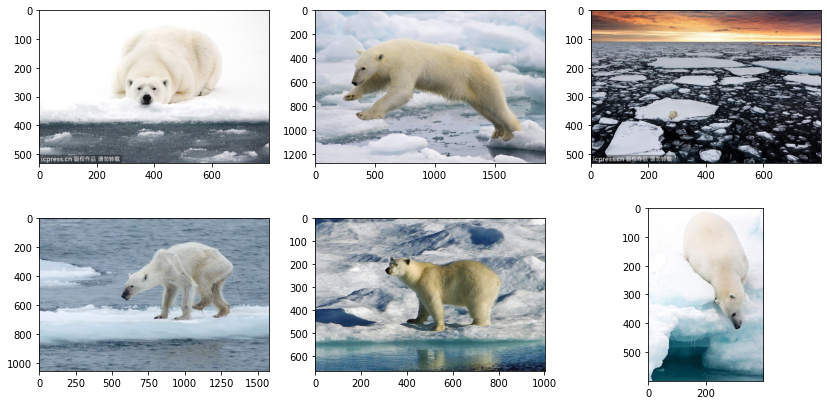

In [ ]:
plt.rcParams['figure.figsize'] = [14, 7]

for idx, polar_image_np in enumerate(polar_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(polar_image_np)
plt.show()

In [ ]:
gt_boxes = []
colab_utils.annotate(polar_images_np, box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [ ]:
gt_boxes

[array([[0.08623106, 0.28      , 0.66789773, 0.81875   ]]),
 array([[0.1695644 , 0.11197917, 0.8945644 , 0.9074337 ]]),
 array([[0.64289773, 0.31625   , 0.73289773, 0.39      ]]),
 array([[0.13289773, 0.33670886, 0.71289773, 0.86283083]]),
 array([[0.19789773, 0.27944112, 0.7745644 , 0.83033932]]),
 array([[0.00789773, 0.26      , 0.75623106, 0.9375    ]])]

In [ ]:
np.save("weights",gt_boxes)

In [ ]:
!ls

downloads  models  sample_data	weights.npy


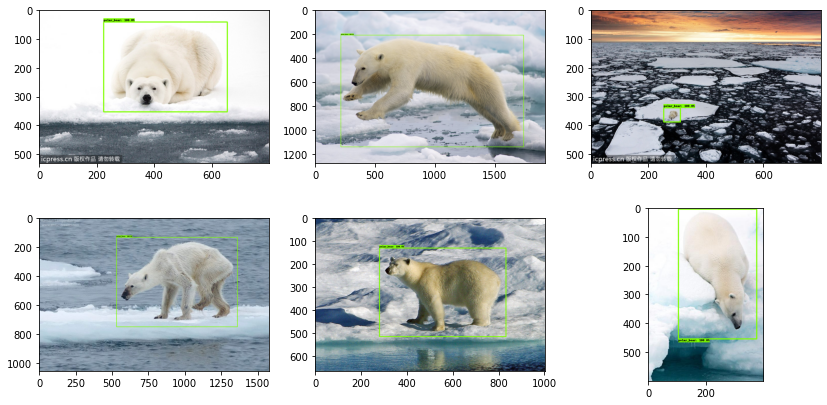

In [ ]:
for idx in range(6):
  plt.subplot(2, 3, idx+1)
  image_np_with_annotations = polar_images_np[idx].copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
      np.array([1.0], dtype=np.float32),
      {1: {'id': 1, 'name': 'polar_bear'}},
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  plt.imshow(image_np_with_annotations)